# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Upload Dataset

In [5]:
# use pandas

dataset = pd.read_csv("modified_diabetes_prediction_dataset.csv")

In [6]:
print (dataset.head())

    gender   age  hypertension  ...  HbA1c_level blood_glucose_level  diabetes
0  unknown  78.0             0  ...          6.6                 140         0
1   Female   NaN             0  ...          6.6                  80         0
2     Male  28.0             0  ...          5.7                9999         0
3   Female  37.0             0  ...          NaN                 155         0
4     Male  75.0             1  ...          4.8                 155         0

[5 rows x 9 columns]


In [7]:
print (dataset.shape)

(100001, 9)


# Use Tabulate

In [8]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+---------+------+--------------+---------------+-----------------+-------------+-------------+---------------------+----------+
|   | gender  | age  | hypertension | heart_disease | smoking_history |     bmi     | HbA1c_level | blood_glucose_level | diabetes |
+---+---------+------+--------------+---------------+-----------------+-------------+-------------+---------------------+----------+
| 0 | unknown | 78.0 |      0       |       1       |      never      | 101.6650153 |     6.6     |         140         |    0     |
| 1 | Female  | nan  |      0       |       0       |     No Info     | 28.03457192 |     6.6     |         80          |    0     |
| 2 |  Male   | 28.0 |      0       |       0       |       nan       | 25.36915222 |     5.7     |        9999         |    0     |
| 3 | Female  | 37.0 |      0       |       0       |       yes       | 25.26260189 |     nan     |         155         |    0     |
| 4 |  Male   | 75.0 |      1       |       1       |     current    

# Missing Values

In [9]:
print (dataset.isnull().sum())

gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64


# delete Age columns null data

In [10]:
dataset.dropna(subset=['age'], inplace=True)

In [11]:
print (dataset.shape)

(99999, 9)


In [12]:
print(dataset['smoking_history'].isnull().sum())

1


In [13]:
print (dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64


In [14]:
mode_smoking = dataset['smoking_history'].mode()[0]
dataset['smoking_history'] = dataset['smoking_history'].fillna(mode_smoking)


In [15]:
print (dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64


In [16]:
dataset.dropna(subset=['HbA1c_level'], inplace=True)

In [17]:
dataset.shape

(99998, 9)

In [18]:
print (dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


# fix duplicated data in dataset

In [19]:
print (dataset.duplicated().sum())

0


# fix outliers data in dataset

In [20]:
Q1 = dataset['age'].quantile(0.25)
Q3 = dataset['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['age'] < lower_bound) | (dataset['age'] > upper_bound)]
print (len(outliers))

0


# Body Mass Index (BMI)

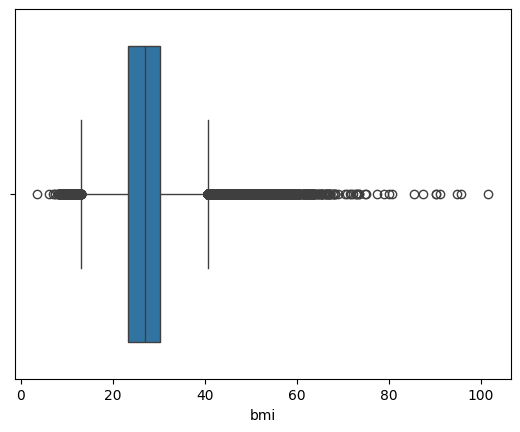

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x = dataset['bmi'])
plt.show()

In [22]:

Q1 = dataset['bmi'].quantile(0.25)
Q3 = dataset['bmi'].quantile(0.75)
IQR = Q3 - Q1

outliers = dataset[(dataset['bmi'] < (Q1 - 1.5 * IQR)) | (dataset['bmi'] > (Q3 + 1.5 * IQR))]

num_outliers = len(outliers)
print(f"count: {num_outliers}")

count: 5198


In [23]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+---------+------+--------------+---------------+-----------------+-------------+-------------+---------------------+----------+
|   | gender  | age  | hypertension | heart_disease | smoking_history |     bmi     | HbA1c_level | blood_glucose_level | diabetes |
+---+---------+------+--------------+---------------+-----------------+-------------+-------------+---------------------+----------+
| 0 | unknown | 78.0 |      0       |       1       |      never      | 101.6650153 |     6.6     |         140         |    0     |
| 2 |  Male   | 28.0 |      0       |       0       |     No Info     | 25.36915222 |     5.7     |        9999         |    0     |
| 4 |  Male   | 75.0 |      1       |       1       |     current     | 23.21281117 |     4.8     |         155         |    0     |
| 5 | Female  | 16.0 |      0       |       0       |      never      | 28.15637322 |     6.6     |         85          |    0     |
| 6 | Female  | 46.0 |      0       |       0       |      never     

# Delete Rows Bmi more than 60 and less than 10

In [24]:
cleaned_data = dataset[(dataset['bmi'] <= 10) | (dataset['bmi'] >= 60)]
print (len(cleaned_data))

194


In [25]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+---------+------+--------------+---------------+-----------------+-------------+-------------+---------------------+----------+
|   | gender  | age  | hypertension | heart_disease | smoking_history |     bmi     | HbA1c_level | blood_glucose_level | diabetes |
+---+---------+------+--------------+---------------+-----------------+-------------+-------------+---------------------+----------+
| 0 | unknown | 78.0 |      0       |       1       |      never      | 101.6650153 |     6.6     |         140         |    0     |
| 2 |  Male   | 28.0 |      0       |       0       |     No Info     | 25.36915222 |     5.7     |        9999         |    0     |
| 4 |  Male   | 75.0 |      1       |       1       |     current     | 23.21281117 |     4.8     |         155         |    0     |
| 5 | Female  | 16.0 |      0       |       0       |      never      | 28.15637322 |     6.6     |         85          |    0     |
| 6 | Female  | 46.0 |      0       |       0       |      never     

# Replace Rows Bmi more than 60 and less than 10 by Median

In [26]:
median_bmi = dataset['bmi'].median()

dataset.loc[(dataset['bmi'] <= 10) | (dataset['bmi'] >= 60), 'bmi'] = median_bmi
print(dataset['bmi'].describe())

count    99998.000000
mean        27.281647
std          6.772322
min         10.008687
25%         23.398534
50%         26.964728
75%         30.253014
max         59.876944
Name: bmi, dtype: float64


In [27]:
print (median_bmi)

26.964728185


In [28]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+---------+------+--------------+---------------+-----------------+--------------+-------------+---------------------+----------+
|   | gender  | age  | hypertension | heart_disease | smoking_history |     bmi      | HbA1c_level | blood_glucose_level | diabetes |
+---+---------+------+--------------+---------------+-----------------+--------------+-------------+---------------------+----------+
| 0 | unknown | 78.0 |      0       |       1       |      never      | 26.964728185 |     6.6     |         140         |    0     |
| 2 |  Male   | 28.0 |      0       |       0       |     No Info     | 25.36915222  |     5.7     |        9999         |    0     |
| 4 |  Male   | 75.0 |      1       |       1       |     current     | 23.21281117  |     4.8     |         155         |    0     |
| 5 | Female  | 16.0 |      0       |       0       |      never      | 28.15637322  |     6.6     |         85          |    0     |
| 6 | Female  | 46.0 |      0       |       0       |      nev

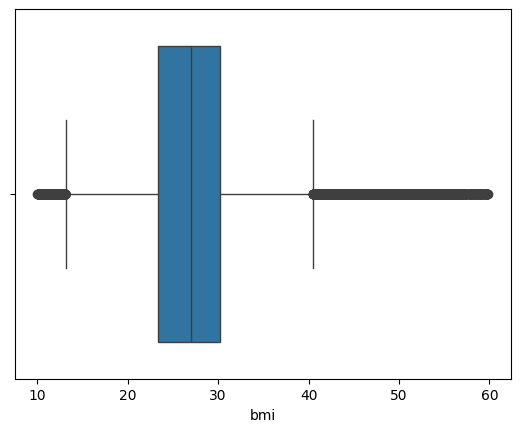

In [29]:
sns.boxplot(x = dataset['bmi'])
plt.show()

# Age Column Outliers

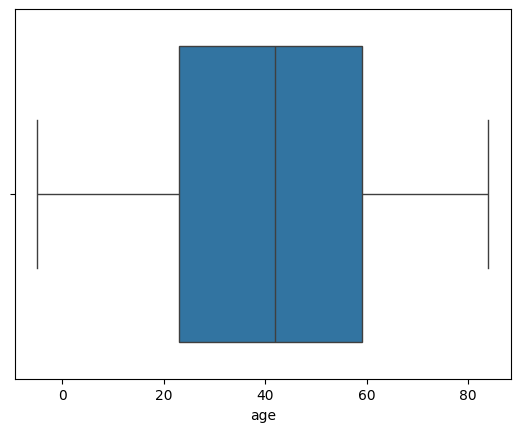

In [30]:
sns.boxplot(x = dataset['age'])
plt.show()

In [31]:
age_data = dataset[(dataset['age'] <= 0)]
print (len(age_data))

1941


# Normal Distribution

#### Histogram Plot

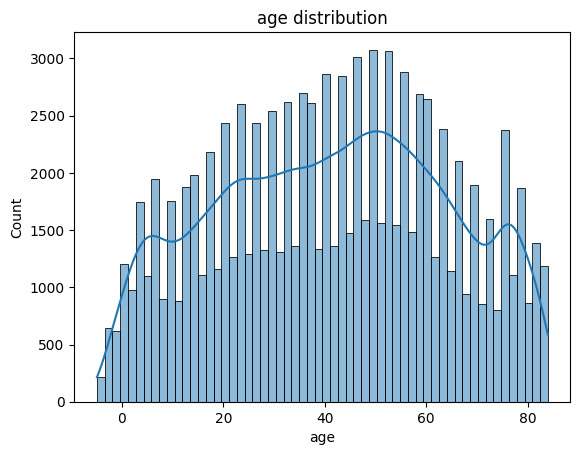

In [32]:
sns.histplot(dataset['age'], kde=True)
plt.title("age distribution")
plt.show()

#### Quantile-Quantile Plot

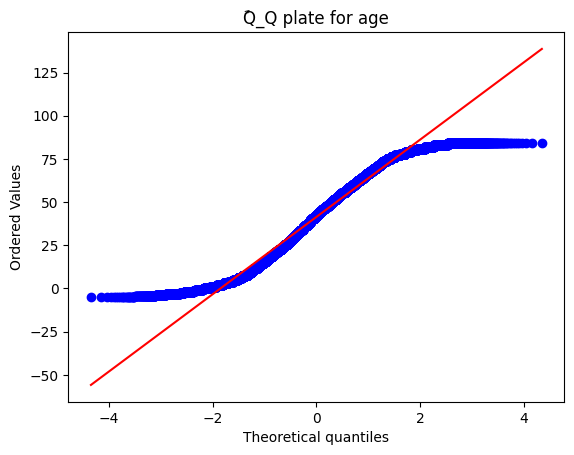

In [33]:
import scipy.stats as stats

stats.probplot(dataset['age'], dist="norm", plot=plt)
plt.title('ًQ_Q plate for age')
plt.show()

# Use Median for age

In [34]:
median_age = dataset['age'].median()
dataset.loc[(dataset['age'] <= 0) , 'age'] = median_age
print (dataset['age'].describe())

count    99998.000000
mean        42.238528
std         21.846147
min          0.080000
25%         25.000000
50%         42.000000
75%         59.000000
max         84.000000
Name: age, dtype: float64


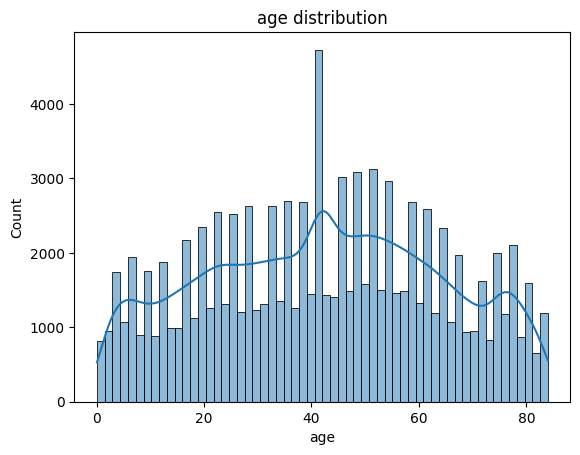

In [35]:
sns.histplot(dataset['age'], kde=True)
plt.title("age distribution")
plt.show()

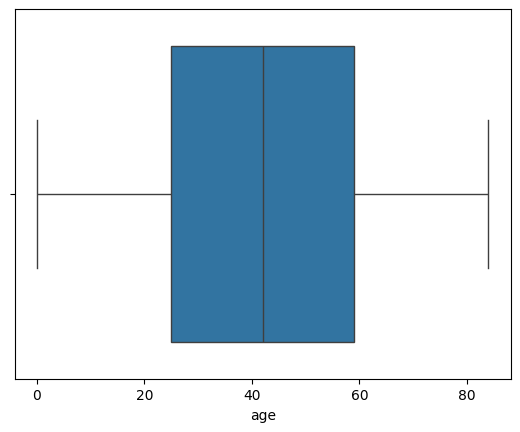

In [36]:
sns.boxplot(x = dataset['age'])
plt.show()

# Float data for Age fixed

In [37]:
decimal_values = dataset[dataset['age'] % 1 != 0]

print(len(decimal_values))

1157


In [38]:
dataset['age'] = dataset['age'].round().astype(int)

In [39]:
print (len(dataset[dataset['age'] % 1 != 0]))

0


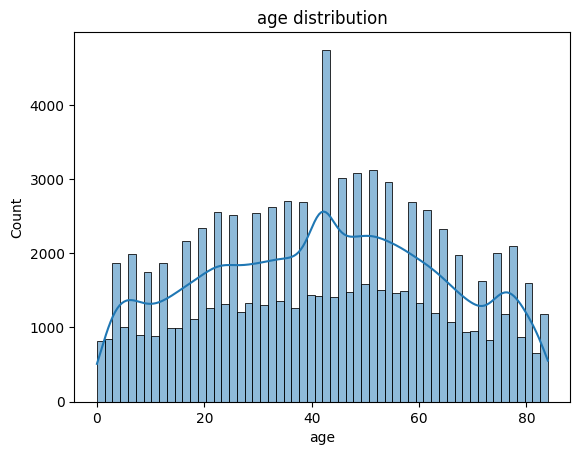

In [40]:
sns.histplot(dataset['age'], kde=True)
plt.title("age distribution")
plt.show()

In [41]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+---------+-----+--------------+---------------+-----------------+--------------+-------------+---------------------+----------+
|   | gender  | age | hypertension | heart_disease | smoking_history |     bmi      | HbA1c_level | blood_glucose_level | diabetes |
+---+---------+-----+--------------+---------------+-----------------+--------------+-------------+---------------------+----------+
| 0 | unknown | 78  |      0       |       1       |      never      | 26.964728185 |     6.6     |         140         |    0     |
| 2 |  Male   | 28  |      0       |       0       |     No Info     | 25.36915222  |     5.7     |        9999         |    0     |
| 4 |  Male   | 75  |      1       |       1       |     current     | 23.21281117  |     4.8     |         155         |    0     |
| 5 | Female  | 16  |      0       |       0       |      never      | 28.15637322  |     6.6     |         85          |    0     |
| 6 | Female  | 46  |      0       |       0       |      never      

# Analyze blood_glucose_level column

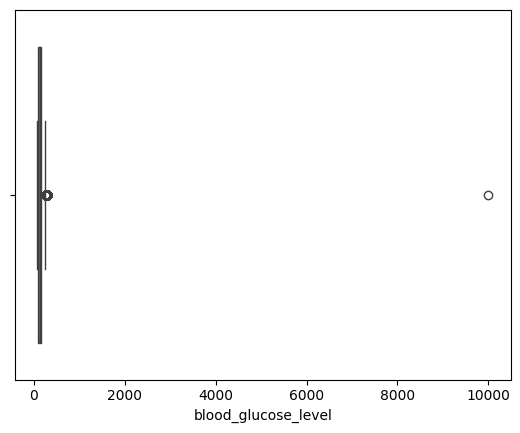

In [42]:
sns.boxplot(x = dataset['blood_glucose_level'])
plt.show()

In [43]:
mean_blood_glucose_level = dataset['blood_glucose_level'].mean()
print (mean_blood_glucose_level)

138.15688313766276


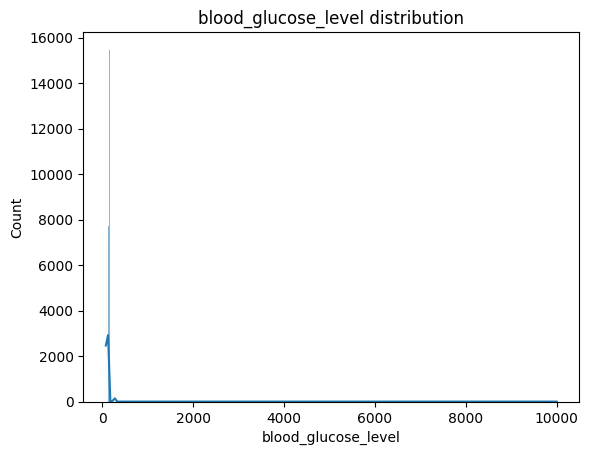

In [44]:
sns.histplot(dataset['blood_glucose_level'], kde=True)
plt.title("blood_glucose_level distribution")
plt.show()

# Delete Outliers Data 

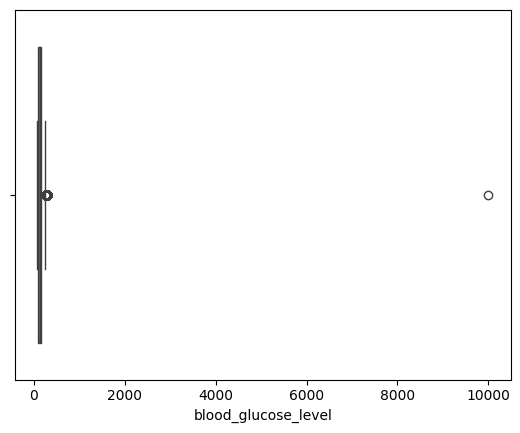

In [45]:
sns.boxplot(x = dataset['blood_glucose_level'])
plt.show()

In [46]:
print (dataset.shape)

(99998, 9)


    gender  age  hypertension  ...  HbA1c_level blood_glucose_level  diabetes
0  unknown   78             0  ...          6.6                 140         0
4     Male   75             1  ...          4.8                 155         0
5   Female   16             0  ...          6.6                  85         0
6   Female   46             0  ...          6.5                 200         1
7   Female   82             0  ...          5.7                  85         0

[5 rows x 9 columns]


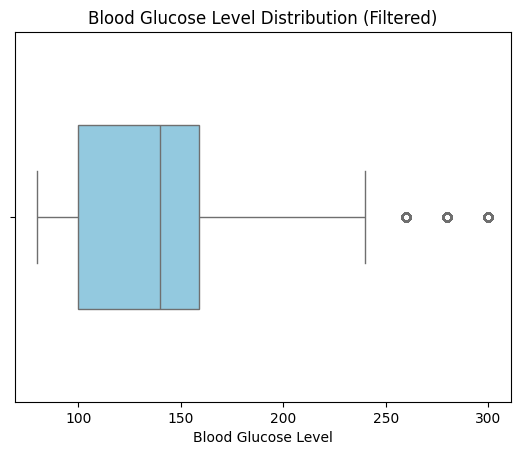

(99997, 9)


In [48]:
dataset = dataset[dataset['blood_glucose_level'] != 9999]

print(dataset.head())

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=dataset['blood_glucose_level'], color="skyblue", width=0.5)
plt.title('Blood Glucose Level Distribution (Filtered)')
plt.xlabel('Blood Glucose Level')
plt.show()

print (dataset.shape)

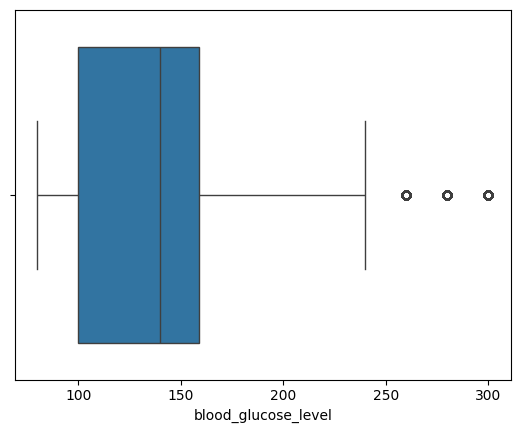

In [49]:
sns.boxplot(x = dataset['blood_glucose_level'])
plt.show()

In [50]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+---------+-----+--------------+---------------+-----------------+--------------+-------------+---------------------+----------+
|   | gender  | age | hypertension | heart_disease | smoking_history |     bmi      | HbA1c_level | blood_glucose_level | diabetes |
+---+---------+-----+--------------+---------------+-----------------+--------------+-------------+---------------------+----------+
| 0 | unknown | 78  |      0       |       1       |      never      | 26.964728185 |     6.6     |         140         |    0     |
| 4 |  Male   | 75  |      1       |       1       |     current     | 23.21281117  |     4.8     |         155         |    0     |
| 5 | Female  | 16  |      0       |       0       |      never      | 28.15637322  |     6.6     |         85          |    0     |
| 6 | Female  | 46  |      0       |       0       |      never      | 16.54644949  |     6.5     |         200         |    1     |
| 7 | Female  | 82  |      0       |       0       |     No Info     

In [51]:
mean_blood_glucose_level = dataset['blood_glucose_level'].mean()
print (mean_blood_glucose_level)

138.05827174815244


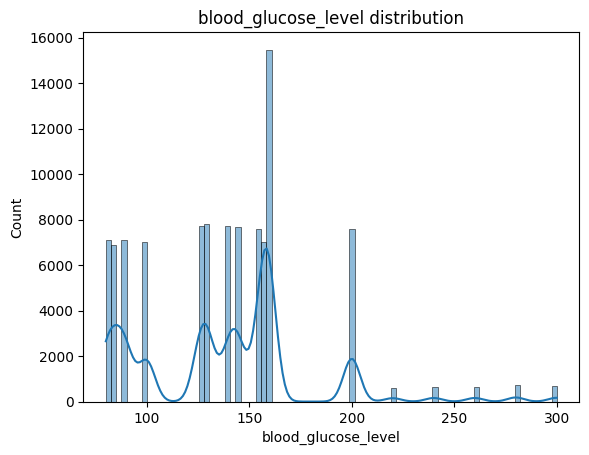

In [52]:
sns.histplot(dataset['blood_glucose_level'], kde=True)
plt.title("blood_glucose_level distribution")
plt.show()

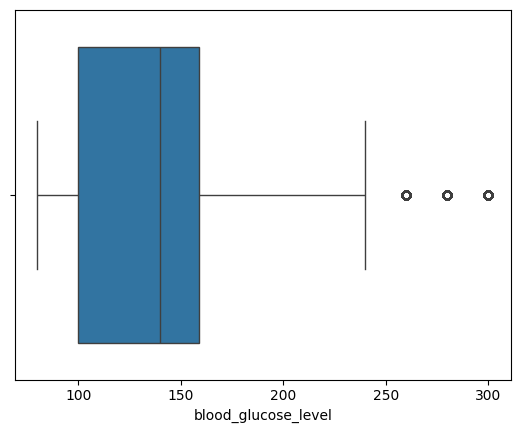

In [53]:
sns.boxplot(x = dataset['blood_glucose_level'])
plt.show()

# HbA1c_level column Analyze 

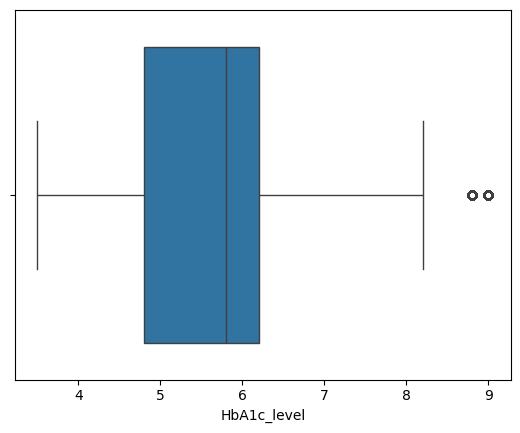

In [54]:
sns.boxplot(x = dataset['HbA1c_level'])
plt.show()

In [55]:
HbA1c_level_data = dataset[(dataset['HbA1c_level'] <= 0)]
print (len(HbA1c_level_data))

0


# Check for Heart_Disease

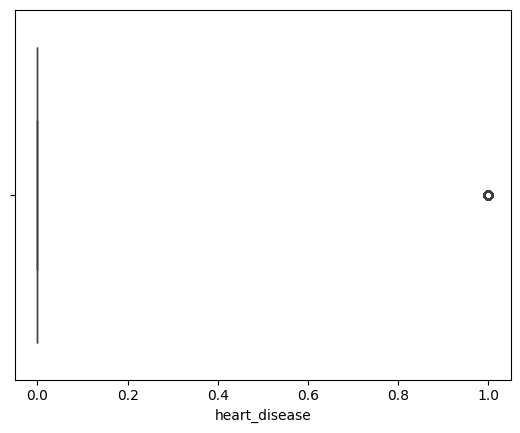

In [56]:
sns.boxplot(x = dataset['heart_disease'])
plt.show()

In [57]:
invalid_count = len(dataset[~dataset['heart_disease'].isin([0, 1])])

print(f"print: {invalid_count}")

print: 0


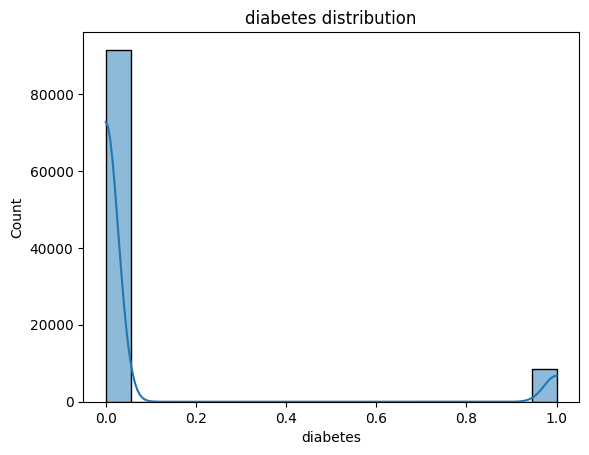

In [58]:
sns.histplot(dataset['diabetes'], kde=True)
plt.title("diabetes distribution")
plt.show()

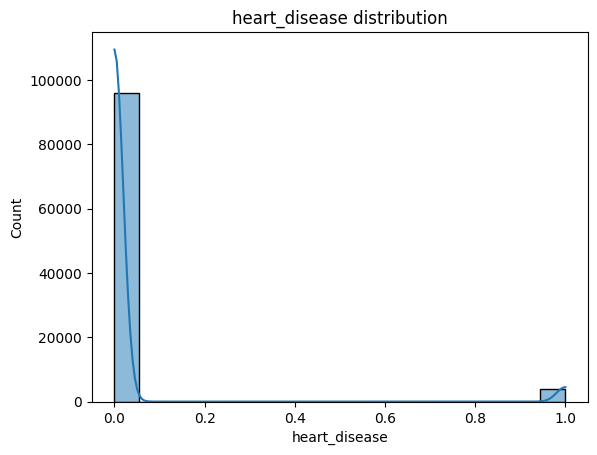

In [59]:
sns.histplot(dataset['heart_disease'], kde=True)
plt.title("heart_disease distribution")
plt.show()

# check for hypertension

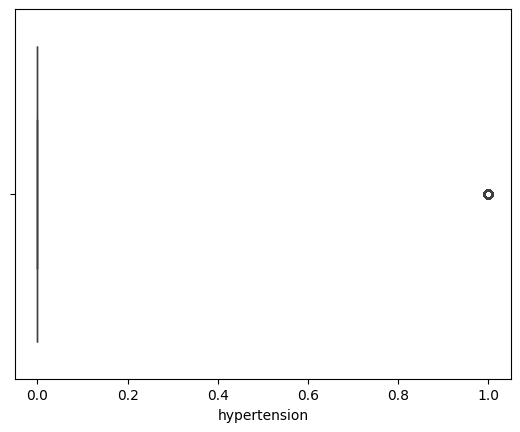

In [60]:
sns.boxplot(x = dataset['hypertension'])
plt.show()

In [61]:
invalid_count = len(dataset[~dataset['hypertension'].isin([0, 1])])

print(f"print: {invalid_count}")

print: 0


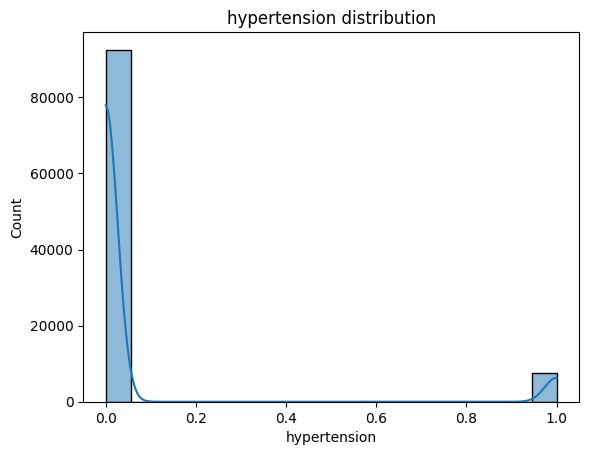

In [62]:
sns.histplot(dataset['hypertension'], kde=True)
plt.title("hypertension distribution")
plt.show()

In [63]:
print (dataset.shape)

(99997, 9)


# Classification algorithms and their comparison

#### Train , Test and Validation Data

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
x = dataset.drop("diabetes" , axis=1) # dataset without "diabetes"
y = dataset["diabetes"] # dataset column diabets

In [94]:
print (x.shape)

(99997, 8)


In [95]:
print (y.shape)

(99997,)


#### Split data by train+validation and test

# # Normalization

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#### LabelEncoder 

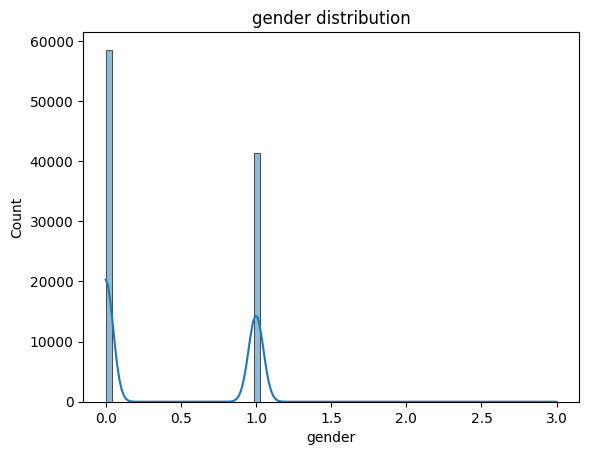

In [97]:
sns.histplot(dataset['gender'], kde=True)
plt.title("gender distribution")
plt.show()

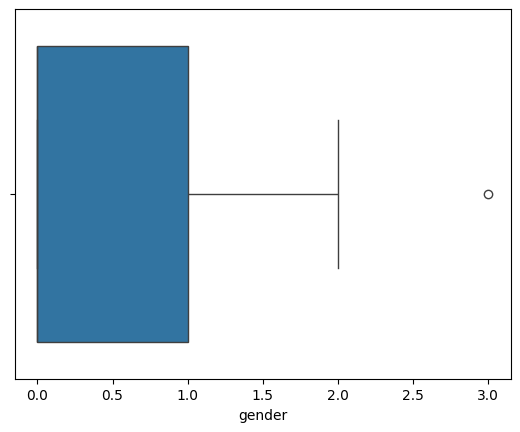

In [98]:
sns.boxplot(x = dataset['gender'])
plt.show()

In [101]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
|   | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level | diabetes |
+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
| 0 |   3    | 78  |      0       |       1       |        4        | 26  |      6      |         140         |    0     |
| 4 |   1    | 75  |      1       |       1       |        1        | 23  |      4      |         155         |    0     |
| 5 |   0    | 16  |      0       |       0       |        4        | 28  |      6      |         85          |    0     |
| 6 |   0    | 46  |      0       |       0       |        4        | 16  |      6      |         200         |    1     |
| 7 |   0    | 82  |      0       |       0       |        0        | 25  |      5      |         85          |    0     |
+---+--------+--

In [102]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['smoking_history'] = encoder.fit_transform(dataset['smoking_history'])

In [103]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
|   | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level | diabetes |
+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
| 0 |   3    | 78  |      0       |       1       |        4        | 26  |      6      |         140         |    0     |
| 4 |   1    | 75  |      1       |       1       |        1        | 23  |      4      |         155         |    0     |
| 5 |   0    | 16  |      0       |       0       |        4        | 28  |      6      |         85          |    0     |
| 6 |   0    | 46  |      0       |       0       |        4        | 16  |      6      |         200         |    1     |
| 7 |   0    | 82  |      0       |       0       |        0        | 25  |      5      |         85          |    0     |
+---+--------+--

In [104]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['gender'] = encoder.fit_transform(dataset['gender'])

In [105]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
|   | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level | diabetes |
+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
| 0 |   3    | 78  |      0       |       1       |        4        | 26  |      6      |         140         |    0     |
| 4 |   1    | 75  |      1       |       1       |        1        | 23  |      4      |         155         |    0     |
| 5 |   0    | 16  |      0       |       0       |        4        | 28  |      6      |         85          |    0     |
| 6 |   0    | 46  |      0       |       0       |        4        | 16  |      6      |         200         |    1     |
| 7 |   0    | 82  |      0       |       0       |        0        | 25  |      5      |         85          |    0     |
+---+--------+--

# smoking_history

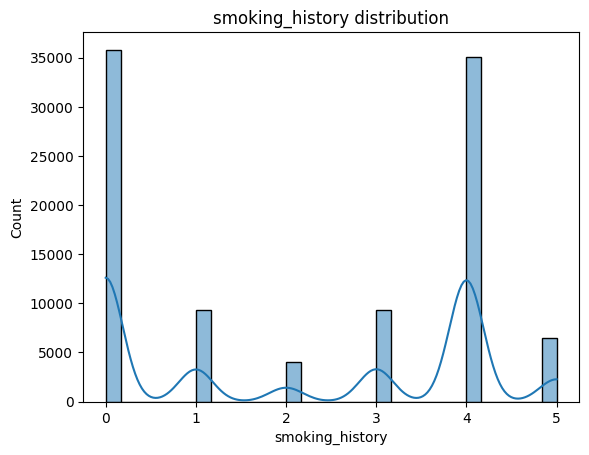

In [106]:
sns.histplot(dataset['smoking_history'], kde=True)
plt.title("smoking_history distribution")
plt.show()

# Normalization by MinMaxScaler

In [108]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
|   | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level | diabetes |
+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
| 0 |   3    | 78  |      0       |       1       |        4        | 26  |      6      |         140         |    0     |
| 4 |   1    | 75  |      1       |       1       |        1        | 23  |      4      |         155         |    0     |
| 5 |   0    | 16  |      0       |       0       |        4        | 28  |      6      |         85          |    0     |
| 6 |   0    | 46  |      0       |       0       |        4        | 16  |      6      |         200         |    1     |
| 7 |   0    | 82  |      0       |       0       |        0        | 25  |      5      |         85          |    0     |
+---+--------+--

In [109]:
dataset = dataset.astype(int)

In [110]:
print(tabulate(dataset.head(), headers='keys', tablefmt='pretty'))

+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
|   | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level | diabetes |
+---+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+----------+
| 0 |   3    | 78  |      0       |       1       |        4        | 26  |      6      |         140         |    0     |
| 4 |   1    | 75  |      1       |       1       |        1        | 23  |      4      |         155         |    0     |
| 5 |   0    | 16  |      0       |       0       |        4        | 28  |      6      |         85          |    0     |
| 6 |   0    | 46  |      0       |       0       |        4        | 16  |      6      |         200         |    1     |
| 7 |   0    | 82  |      0       |       0       |        0        | 25  |      5      |         85          |    0     |
+---+--------+--

# Train Test Validation Data

#### Train , Test and Validation Data

In [111]:
x_train_val , x_test , y_train_val , y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

#### Split data train+validation to train and validation

In [112]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [113]:
print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (63997, 8) (63997,)
Validation set: (16000, 8) (16000,)
Test set: (20000, 8) (20000,)


In [114]:
print(tabulate(x_train.head(), headers='keys', tablefmt='pretty'))

+-------+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+
|       | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level |
+-------+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+
| 48067 |   1    | 53  |      0       |       0       |        1        | 38  |      6      |         85          |
| 97375 |   1    | 42  |      0       |       0       |        0        | 21  |      4      |         85          |
| 93314 |   0    | 49  |      0       |       0       |        4        | 47  |      6      |         159         |
| 28843 |   0    | 67  |      0       |       0       |        4        | 22  |      5      |         85          |
| 14161 |   0    | 78  |      0       |       0       |        3        | 26  |      4      |         85          |
+-------+--------+-----+--------------+---------------+-----------------

In [115]:
print(tabulate(x_test.head(), headers='keys', tablefmt='pretty'))

+-------+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+
|       | gender | age | hypertension | heart_disease | smoking_history | bmi | HbA1c_level | blood_glucose_level |
+-------+--------+-----+--------------+---------------+-----------------+-----+-------------+---------------------+
| 33971 |   0    | 48  |      1       |       0       |        4        | 33  |      5      |         155         |
| 24615 |   0    | 63  |      0       |       0       |        0        | 17  |      6      |         140         |
| 42680 |   1    | 14  |      0       |       0       |        0        | 27  |      5      |         140         |
| 9735  |   0    | 10  |      0       |       0       |        0        | 14  |      5      |         158         |
| 7132  |   0    | 84  |      0       |       0       |        0        | 30  |      6      |         140         |
+-------+--------+-----+--------------+---------------+-----------------

# Train Model

### Logestic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# Testing and verification

In [118]:
from sklearn.metrics import classification_report , accuracy_score

y_pred = model.predict(x_test)
print ("Accuracy:" , accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9576
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18278
           1       0.87      0.60      0.71      1722

    accuracy                           0.96     20000
   macro avg       0.92      0.79      0.84     20000
weighted avg       0.96      0.96      0.95     20000



# Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
conf_matrix = confusion_matrix(y_test, y_pred)

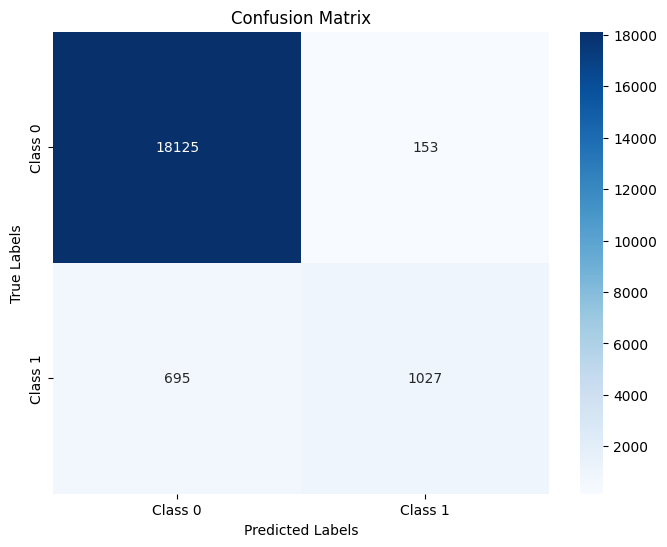

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [123]:
TN = conf_matrix[1, 1]  
FP = conf_matrix[0, 1]  
TP = conf_matrix[0, 0]  
FN = conf_matrix[1, 0]

In [124]:
print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

True Positives: 18125
False Positives: 153
True Negatives: 1027
False Negatives: 695


In [125]:
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

In [146]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9576
Precision: 0.9916292811029653
Recall: 0.9630712008501594
F1-Score: 0.9771416248854385


In [147]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_pred)

print("Loss:", loss)

Loss: 1.5282509036985674


In [153]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()